Name: Ishant Rawat

Student ID: 1007084824

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
sns.set_style('darkgrid')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
!pip install pmdarima
from sklearn import metrics
import sklearn.metrics


In [ ]:
df = pd.read_csv('/content/Covid19-vaccination.csv')
df_comp = pd.read_csv('/content/Complete_covid19_dataset (1).csv')
df.shape

(63006, 16)

In [ ]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


#1. Data Cleaning – [1 mark] 

#**Summary:**

**Step 1:**

Our dataset contains a lot of null values. To clean the null values we first drop the null values in our 'total_vaccination' feature as it is most the important feature in our dataset and we cannot move ahead with other columns if we do not have the total vaccination count.

**Step 2:**

We try to investigate if the our features have any co-relation with the total_vaccination feature. 

**Step 3:**

For features that have high co-relation, we perform statistical tests (mann whitney u test) to check if both the features have the same distribution. If the features have the same distribution we can replace the null values with the difference of means of both features, if not we can replace them directly with zero as imputing means in this case would lead to misleading results.

In our dataset, none of the highly co-related features have same distribution and thus we have replaced the null values with zero.

**Step 4:**

we fill null values with zero for features having low co-relation.



In [ ]:
df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

In [ ]:
df = df.drop(df[df.total_vaccinations.isna()].index)
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
total_vaccinations,1.000000,0.995232,0.966423,0.672744,0.816862,0.842728,0.120289,0.099102,0.064036,-0.134280,0.034264,0.487638,0.016134
people_vaccinated,0.995232,1.000000,0.963243,0.655629,0.822495,0.848914,0.095789,0.098042,0.056662,-0.139450,0.025118,0.512126,0.023502
people_fully_vaccinated,0.966423,0.963243,1.000000,0.728574,0.690315,0.715729,0.115908,0.114046,0.103874,-0.124287,0.008754,0.413243,0.006998
total_boosters,0.672744,0.655629,0.728574,1.000000,0.379530,0.396076,0.118574,0.113997,0.104478,0.045232,-0.041850,0.203419,-0.052081
daily_vaccinations_raw,0.816862,0.822495,0.690315,0.379530,1.000000,0.978711,0.012895,-0.003667,-0.056822,-0.162178,0.058680,0.601633,0.046847
daily_vaccinations,0.842728,0.848914,0.715729,0.396076,0.978711,1.000000,0.023468,0.008697,-0.045624,-0.166620,0.067206,0.611026,0.051291
total_vaccinations_per_hundred,0.120289,0.095789,0.115908,0.118574,0.012895,0.023468,1.000000,0.982115,0.979166,0.573350,0.309210,0.002170,0.036690
people_vaccinated_per_hundred,0.099102,0.098042,0.114046,0.113997,-0.003667,0.008697,0.982115,1.000000,0.948047,0.443393,0.387545,0.001171,0.118138
people_fully_vaccinated_per_hundred,0.064036,0.056662,0.103874,0.104478,-0.056822,-0.045624,0.979166,0.948047,1.000000,0.478420,0.191230,-0.036228,-0.083816
total_boosters_per_hundred,-0.134280,-0.139450,-0.124287,0.045232,-0.162178,-0.166620,0.573350,0.443393,0.478420,1.000000,0.031196,-0.107249,-0.239137


Dealing with null values in the dataset

In [ ]:
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


**Discussion:**
From the above correlation matrix we observe that features 'people_vaccinated', ' people_fully_vaccinated', ' daily_vaccinations' and 'daily_vaccinations_raw' have very high corelation with the 'total_vaccinations' feature.
 
To further investigate about the distribution of the data points and to impute null values accordingly, we perform Mann-WhitneyU statistical test on our dataset.


In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(check_df.total_vaccinations, check_df.people_vaccinated,alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions; impute null values with zero')

stat=622015569.000, p=0.000
Probably different distributions; impute null values with zero


Since, the distribution of the data points of the two features is not similar, we fill the nan values with 0.

In [ ]:
df.people_vaccinated.fillna(0,inplace=True)

people_fully_vaccinated

In [ ]:
check_df = df.drop(df[df.people_fully_vaccinated.isna()].index)


In [ ]:
stat, p = mannwhitneyu(check_df.total_vaccinations, check_df.people_fully_vaccinated,alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions, impute null values with zero')

stat=592928748.500, p=0.000
Probably different distributions, impute null values with zero


In [ ]:
df.people_fully_vaccinated.fillna(0,inplace=True)

daily_vaccinations

In [ ]:
check_df = df.drop(df[df.daily_vaccinations.isna()].index)
stat, p = mannwhitneyu(check_df.total_vaccinations, check_df.daily_vaccinations,alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions; impute null values with zero')

stat=1096890968.500, p=0.000
Probably different distributions; impute null values with zero


In [ ]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)

daily_vaccinations_raw

In [ ]:
check_df = df.drop(df[df.daily_vaccinations_raw.isna()].index)
stat, p = mannwhitneyu(check_df.total_vaccinations, check_df.daily_vaccinations_raw,alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions; impute null values with zero')

stat=787743639.500, p=0.000
Probably different distributions; impute null values with zero


In [ ]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

**Since the remainging features have very co-relation with the total_vaccinations feature, we will replace the nan values with 0 for features having low co-relation**

In [ ]:
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.total_boosters.fillna(0,inplace=True)
df.total_boosters_per_hundred.fillna(0,inplace = True)
df.daily_people_vaccinated.fillna(0,inplace=True)  
df.daily_people_vaccinated_per_hundred.fillna(0,inplace=True) 

In [ ]:
df.isnull().sum() == True

location                               False
iso_code                               False
date                                   False
total_vaccinations                     False
people_vaccinated                      False
people_fully_vaccinated                False
total_boosters                         False
daily_vaccinations_raw                 False
daily_vaccinations                     False
total_vaccinations_per_hundred         False
people_vaccinated_per_hundred          False
people_fully_vaccinated_per_hundred    False
total_boosters_per_hundred             False
daily_vaccinations_per_million         False
daily_people_vaccinated                False
daily_people_vaccinated_per_hundred    False
dtype: bool

 our dataset does not contain any null values

# 2. Data Visualization and Exploratory Data Analysis – [4 marks] 

#**Summary:** 

In this step we try to extract some insights from our dataset to better understand the situation of various countries in terms of their vaccination and performance through the Covid-19 pandemic.

**Plot 1:** In the first plot we check the five most vaccinated countries in the world. As can be seen in the plot, China is the most vaccinated country in the world followed by India and the United States, Brazil and Japan. It must be noted that all these countries are also the most populous countries of the world and thus, even though they high vaccination rates, they still have a long way to go in achieving atleast 80% vaccination in their respective countries.

**Plot 2:** It is no surpirse that the top vaccinated countries of the world also outperform other countries in thei daily vaccine rate.

**Plot 3:** In plot 3 we try to visualise the daily vaccination progress of the countries with respect to time. From our plots, we observed a linearly steep increasing curve for china with time wehereas, for countries like India and United States, the rate of vaccination shows a gradual increase with time. 

**Plot 4 and 5:** For these plots we tried to observe the countries that have poor perfromance in terms of both daily vaccination rate and total vaccinations overall.

**Plot 6:** In this plot we try to discover countries that were able to deliver the most amount of booster shots to their citizens. China was still the best performing country however, India was not able to deliver as many booster shots as the first dose. On other hand countries like United Kingdom and Turkey are among the top 5 countries which have delivered the most amount of booster shots.
This reiterates the fact that the most vaccinated countries in the world does not necessarily indicate that they have vaccinated most part of their population. 


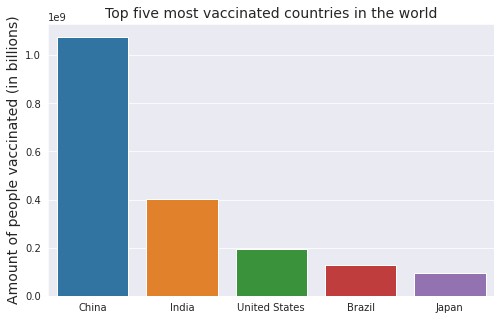

In [ ]:
top_total_vaccinations = df.groupby('location').people_fully_vaccinated.max().sort_values(ascending=False)
top_total_vaccinations = pd.DataFrame(top_total_vaccinations)
top_total_vaccinations.reset_index(inplace=True)
l = ['World', 'Asia', 'Upper middle income', 'Lower middle income', 'High income','Europe', 'North America', 'European Union','South America','Africa']
for i in l:  
  top_total_vaccinations = top_total_vaccinations.drop(top_total_vaccinations.index[top_total_vaccinations['location']==i])
top_total_vaccinations = top_total_vaccinations.groupby('location').people_fully_vaccinated.max().sort_values(ascending=False)
top_total_vaccinations = pd.DataFrame(top_total_vaccinations)
plt.figure(figsize=(8,5))
plt.title('Top five most vaccinated countries in the world',fontsize=14)
sns.barplot(x=top_total_vaccinations.index[:5], y=top_total_vaccinations['people_fully_vaccinated'][:5])
plt.xlabel(' ')
plt.ylabel('Amount of people vaccinated (in billions)',fontsize=14);

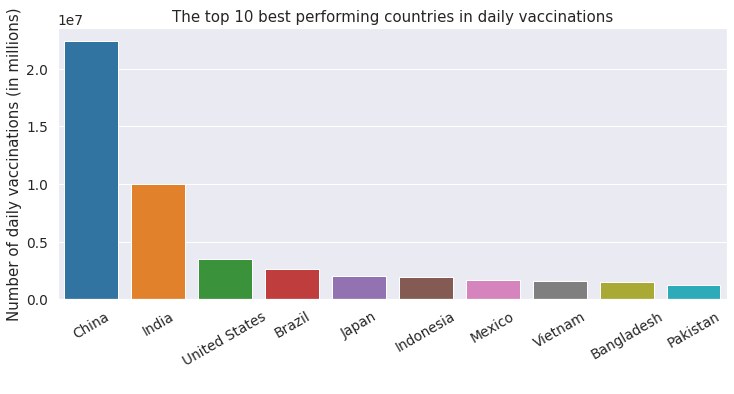

In [ ]:
top_daily = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily  = pd.DataFrame(top_daily )
top_daily .reset_index(inplace=True)
l = ['World', 'Asia', 'Upper middle income', 'Lower middle income', 'High income','Europe', 'North America', 'European Union','South America','Africa']
for i in l:  
  top_daily  = top_daily .drop(top_daily .index[top_daily['location']==i])
top_daily = top_daily.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily = pd.DataFrame(top_daily)
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(12,5))
    plt.title('The top 10 best performing countries in daily vaccinations')
    sns.barplot(x=top_daily.index[0:10], y=top_daily.daily_vaccinations[0:10])
    plt.xlabel(' ')
    plt.xticks(rotation=30)
    plt.ylabel('Number of daily vaccinations (in millions)');

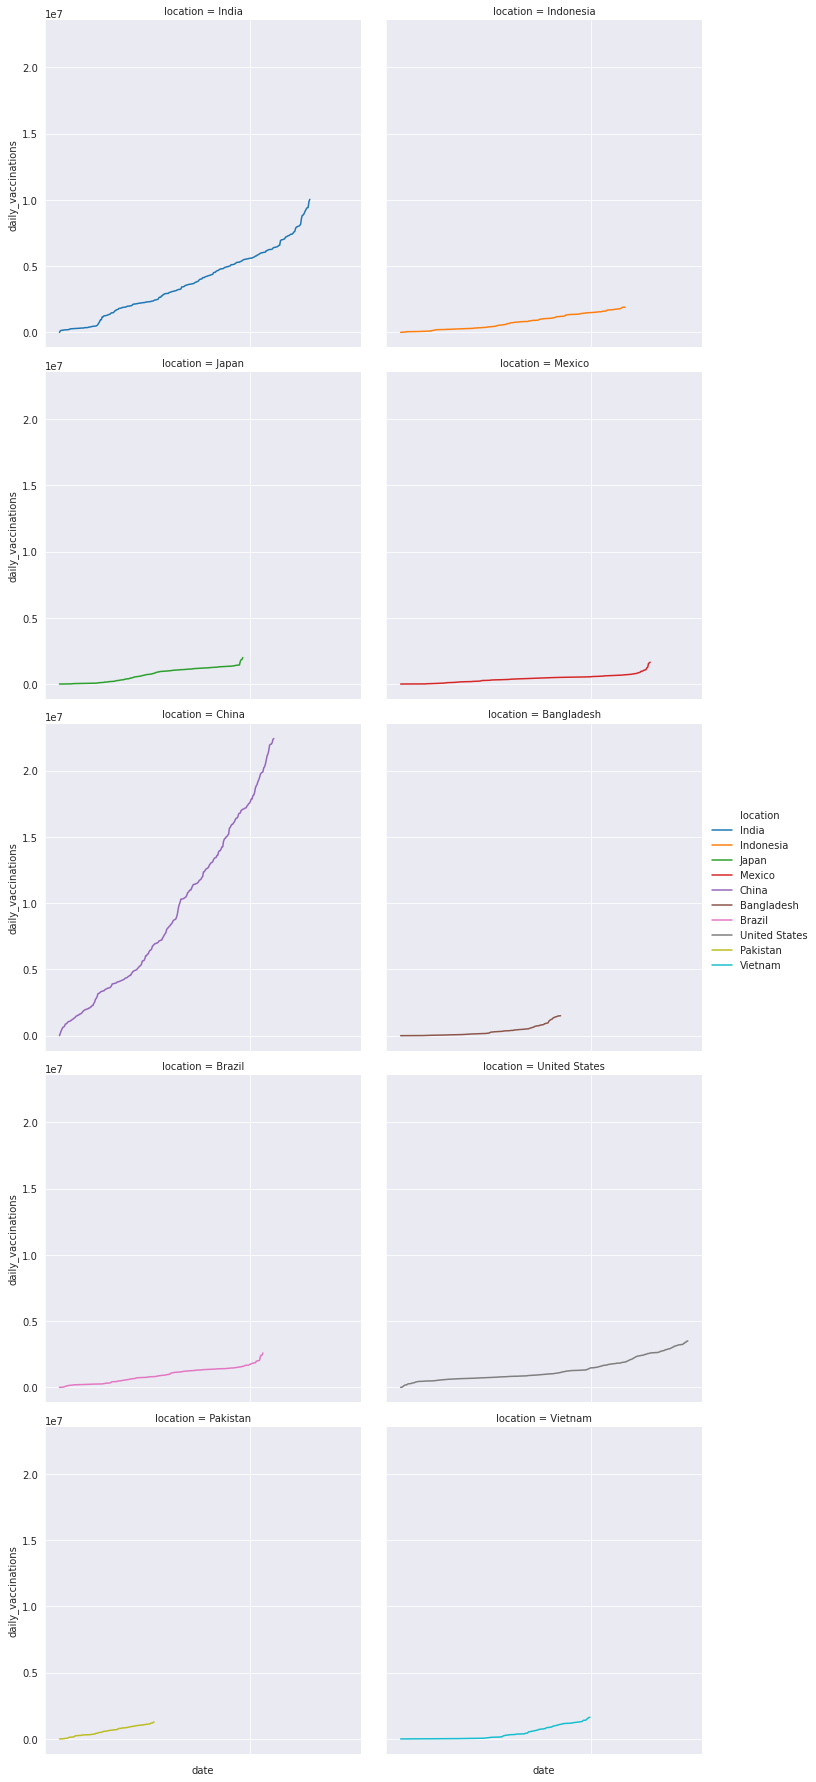

In [ ]:
cols = ['location', 'date', 'daily_vaccinations']
covid_df = df

top_10_countries = [
    'China',
    'India',
    'United States',
    'Brazil',
    'Japan',
    'Indonesia',
    'Mexico',
    'Vietnam',
    'Bangladesh',
    'Pakistan'
]

daily_vacc_df = covid_df[['location', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)
top_10_dv_df = daily_vacc_df[daily_vacc_df.location.isin(top_10_countries)].dropna()

sns.relplot(data=top_10_dv_df, x='date', y='daily_vaccinations', hue='location',kind='line', col='location', col_wrap=2)
plt.xticks('');

In [ ]:
df_c = df[df['location']=='China']
df_i = df[df['location']=='India']
fig = make_subplots(rows=1, cols=2,subplot_titles=("China",'India'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'China',x=df_c['date'], y=df_c['total_vaccinations']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='India',x=df_i['date'], y=df_i['total_vaccinations']),
    row=1, col=2
)

fig.update_layout(height=500, width=1300, title_text="Trend of vaccination in China and India")
fig.show()

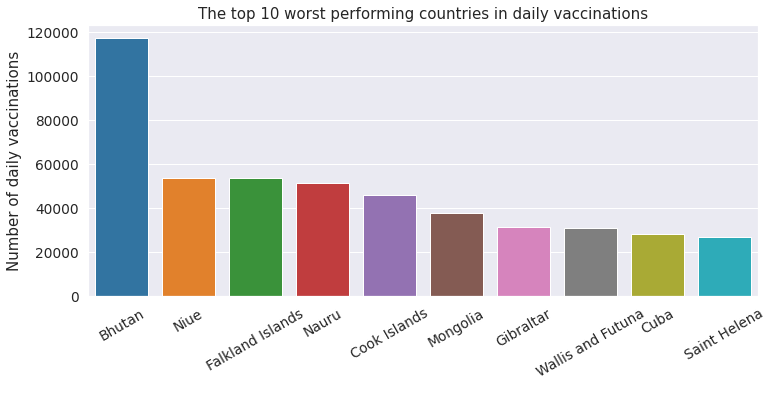

In [ ]:

top_daily_p = df.groupby('location').daily_vaccinations_per_million.max().sort_values(ascending=True)
top_daily_p  = pd.DataFrame(top_daily_p )
top_daily_p .reset_index(inplace=True)
l = ['World', 'Asia', 'Upper middle income', 'Lower middle income', 'High income','Europe', 'North America', 'European Union','South America','Africa']
for i in l:  
  top_daily_p  = top_daily_p .drop(top_daily_p.index[top_daily_p['location']==i])
top_daily_p = top_daily_p.groupby('location').daily_vaccinations_per_million.max().sort_values(ascending=False)
top_daily_p = pd.DataFrame(top_daily_p)
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(12,5))
    plt.title('The top 10 worst performing countries in daily vaccinations')
    sns.barplot(x=top_daily_p.index[0:10], y=top_daily_p.daily_vaccinations_per_million[0:10])
    plt.xlabel(' ')
    plt.xticks(rotation=30)
    plt.ylabel('Number of daily vaccinations');

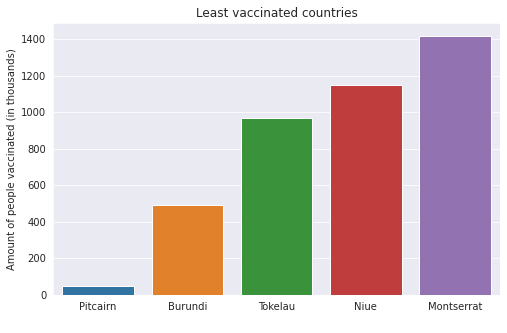

In [ ]:
top_total_vaccinations = df.groupby('location').people_fully_vaccinated.max().sort_values(ascending=True)
top_total_vaccinations = pd.DataFrame(top_total_vaccinations)
top_total_vaccinations.reset_index(inplace=True)
l = ['World', 'Asia', 'Upper middle income', 'Lower middle income', 'High income','Europe', 'North America', 'European Union','South America','Africa']
for i in l:  
  top_total_vaccinations = top_total_vaccinations.drop(top_total_vaccinations.index[top_total_vaccinations['location']==i])
top_total_vaccinations = top_total_vaccinations.groupby('location').people_fully_vaccinated.max().sort_values(ascending=True)
top_total_vaccinations = pd.DataFrame(top_total_vaccinations)
plt.figure(figsize=(8,5))
plt.title('Least vaccinated countries')
sns.barplot(x=top_total_vaccinations.index[:5], y=top_total_vaccinations['people_fully_vaccinated'][:5])
plt.xlabel(' ')
plt.ylabel('Amount of people vaccinated (in thousands)');

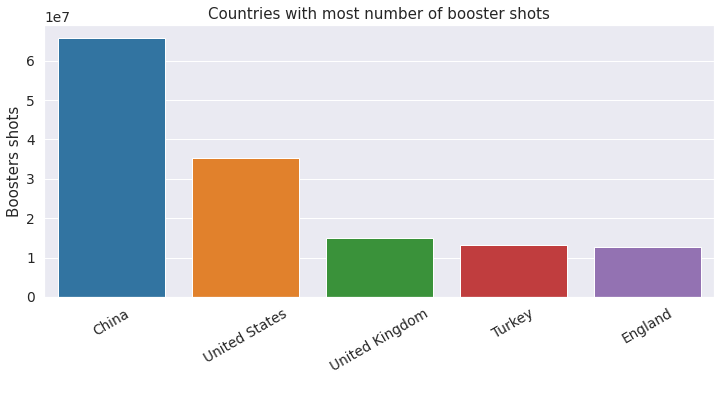

In [ ]:
  
top_daily_p = df.groupby('location').total_boosters.max().sort_values(ascending=False)
top_daily_p  = pd.DataFrame(top_daily_p )
top_daily_p .reset_index(inplace=True)
l = ['World', 'Asia', 'Upper middle income', 'Lower middle income', 'High income','Europe', 'North America', 'European Union','South America','Africa']
for i in l:  
    top_daily_p  = top_daily_p.drop(top_daily_p.index[top_daily_p['location']==i])
top_daily_p = top_daily_p.groupby('location').total_boosters.max().sort_values(ascending=False)
top_daily_p = pd.DataFrame(top_daily_p)
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(12,5))
    plt.title('Countries with most number of booster shots')
    sns.barplot(x=top_daily_p.index[0:5], y=top_daily_p.total_boosters[0:5])
    plt.xlabel(' ')
    plt.xticks(rotation=30)
    plt.ylabel('Boosters shots');

# 3. Model selection and fitting to data – [9 marks] 



# Summary

In this step we will forecast the next 50 in terms of vaccination progress for both Canada and United States. We will use the Auto ARIMA function to build and train our model on the 'total_vaccinations_per_hundred feature.

The ARIMA model is the Auto-Regressive Integrated Moving Average Model in which the model predicts the future forecast based on its own lags. p actually denotes the number of lags to be used as predictors.

The first step is to check the nature of our data. If our data is not stationary, we difference it unitil the stationarity is achieved. The value of d is actually the number of times the series has beeen differenced.

The value of q denotes the number of moving average which indicated the number of lagged errors that would be used by the ARIMA model.

One also need to check the seasonality of the data before performing the differencing operations. If the data is seasonal, it is important to make it both non-seasonal and stationary.

In our case, our data is not seasonal as the curve shows gradual increase with time but as per the adfuller test and the plots below, our data is not stationary. Thus, in order to achieve stationarity had to select an appropriate d-value.

Before giving our data to the model we performed some analysis to find the appropriate differecing values. As per our observations the series achieves stationarity after two differencing operations.

The Auto-ARIMA selects the best model based upon the AIC scores for different combination (p,d and q) values. Thus, for the Canada on compring different models the best combination of (p,d,q) was for (3,2,3) with AIC of -432 while 
for United States the best combination was (2,2,2) for AIC value of about -870. It must be noted that the d value for both models was 2 which reiterated our observation of best d-value as 2.

**Forecast for next 50 days**
**Canada**
For the next 50 days Base-Case scenario vaccination rate prediction would be 6 people per hundred,Best case scenario 10 people per hundred, Worst-Case scenario 2 people per hundred for Canada

**USA**
Vaccination rate prediction in USA for next 50 days:
Base-Case scenario  8 people per hundred
Best case scenario 13 people per hundred
Worst-Case scenario 3 people per hundred







**CANADA**

In [ ]:
df_canada = df[df['location']=='Canada']
val = df_canada['total_vaccinations_per_hundred'].values

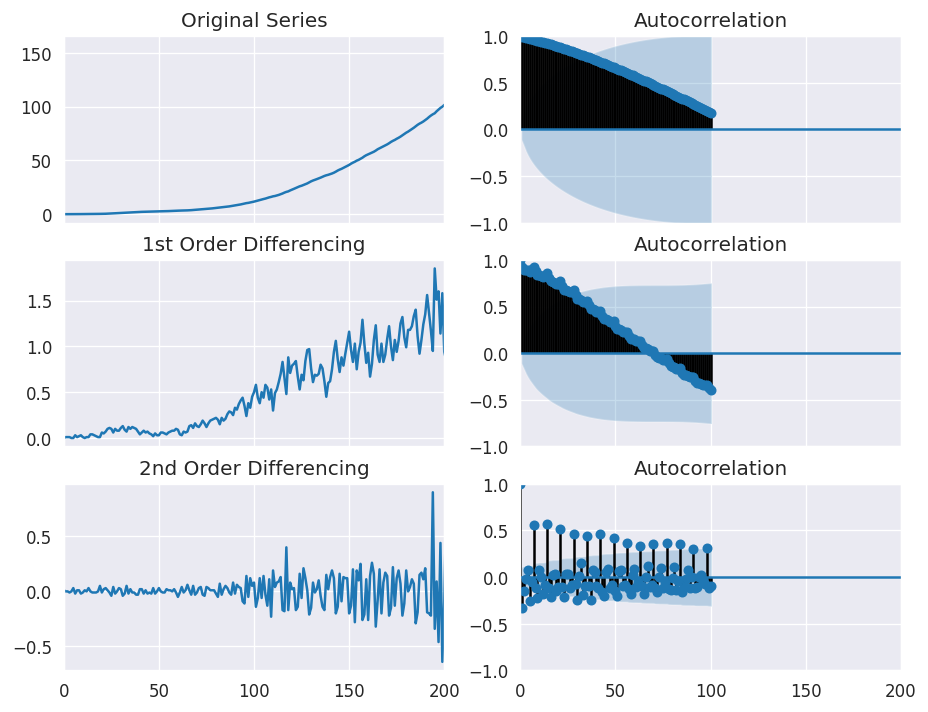

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
axes[0,0].set(xlim = (0,200))
plot_acf(val,lags=100, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val),lags=100, ax=axes[1, 1])
axes[1, 0].set(xlim = (0,200))
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), lags = 100, ax=axes[2, 1])
axes[2, 0].set(xlim = (0,200))
plt.show()

**By looking at the above plots we observe that the data achieves stationarity after second order differencing.
The auto-corelation plots help us determine if our series have been over diffenced or under differenced. In this case, after the first lag the lag into the negative zone above the confidence interval boundary and then fluctutates between positive and negative zones after that. The series going in to negative zone quickly might be an idication that our series has been overdifferenced. 
We will confirm our findings through the values for p,d,q given by the auto-arima model**

**statistical tests to confirm data is not stationary**

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_canada['total_vaccinations_per_hundred'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(vaccination):
    result=adfuller(vaccination)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(df_canada['total_vaccinations_per_hundred'])

ADF Test Statistic : -1.342266957232411
p-value : 0.6096202725045357
#Lags Used : 17
Number of Observations Used : 325
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Discussion:** From the above statistical tests and plots we observe that our dataset is not stationary. In order to perform time series analysis on our dataset, we need to transform our data in to stationary data. In order to achieve that we can perform differencing operation on our dataset. The plots above for both Canada and US show that our dataset becomes stationary after second order differencing.
Now we will also use the auto arima function to verify our values for p,d and q.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model_1 = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', 
max_p=3, max_q=3, 
m=1, 
d=None, 
seasonal=False, 
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True,
with_intercept = True,
)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-391.210, Time=0.47 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-289.702, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-327.381, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-386.558, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-291.702, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-394.326, Time=0.46 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-354.742, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-394.809, Time=0.49 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-369.025, Time=0.32 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-392.327, Time=0.87 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-421.257, Time=0.93 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-391.557, Time=0.74 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-437.289, Time=1.07 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-417.818, Time=0.89 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

**On comparing different models the best model with repect to the AIC scores, the best model has (p,d,q) values of (3,2,3)**

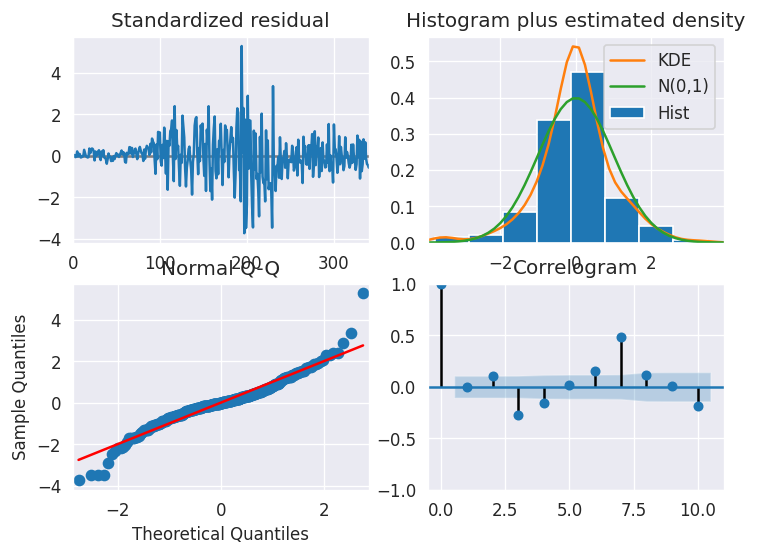

In [ ]:
model_1.plot_diagnostics(figsize=(7,5))
plt.show()

**Discusssion for diagnostics**


**Standardised Residual:**

Residual errors themselves can form a time series with temporary strucuture. An ideal model has no structure in the residual errors and would have only random fluctuations that cannot be modeled.
The plot for residual error of our ARIMA model shows that constant fluctuation of values around mean of zero and that they have a uniform variance. 

**Histogram plus estimated Density**

The plot for suggests that our data is noramlly distributed and has mean zero.
A model that does not have zero mean would indicate that the model could not capture the complete information about the nature of our dataset.

**Quantile-plot**

The plot shows that all almost data points align perfectly along the expected distribution of points. This means that our data is normally distributed and is not skewed. Although, one outlier at the top and some data points that do not align with the line are evident, everything seems good overall.

**Correlogram** 

The plot for autocorelation shows that the residual errors are not auto corelated since most of the errors lie in the confidence interval area and fluctuate between the positive and negative zones.
Auto-corelation would mean that the errors have some structure and the model fails to capture information about some part of the data as stated in the previous steps.

Overall, from our analysis of the diagnostics model, we can conclude that the model meets all expectations and can be used for making predictions.


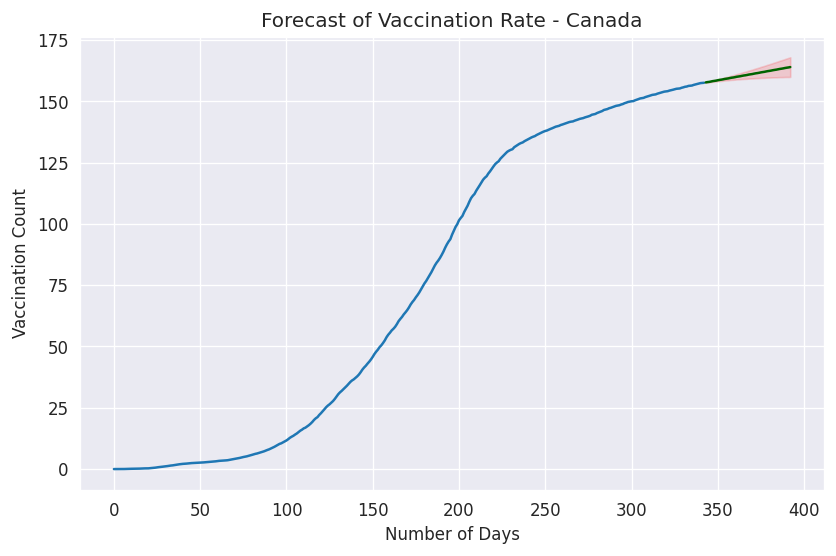

In [ ]:
# Forecast
n_periods = 50
fc, confint = model_1.predict(n_periods=n_periods, return_conf_int=True,alpha=0.65)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(8,5))
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='r', alpha=.15)
plt.title("Forecast of Vaccination Rate - Canada")
plt.xlabel('Number of Days')
plt.ylabel('Vaccination Count')
plt.show()

In [ ]:
print("----------------------------Number of people vaccinated in next 50 days--------------------------------------")
print('Base-Case scenario  {} per hundred'.format(round(fc[-1]-val[-1])))
print('Best case scenario {} per hundred'.format(round(upper_series.iloc[-1]-val[-1])))
print('Worst-Case scenario {} per hundred'.format(round(lower_series.iloc[-1]-val[-1])))

----------------------------Number of people vaccinated in next 50 days--------------------------------------
Base-Case scenario  6 per hundred
Best case scenario 10 per hundred
Worst-Case scenario 2 per hundred


**------------------------------------------------------DISCUSSION---------------------------------------------------------------------------------------------** 

The plot above shows the vaccination trend for the next 50 days for Canada. 
Our plot generates predictions for best case, base case and worst case scenarios. The upper part of the confidence interval (red zone) indicates the best case scenario whereas the region in the centre indicates the base case while the bottom region of the curve indicates the worst case scenario.

Our plot shows that the base case follows the current trent of the curve showing gradual increase in the total nuber of vaccinations.

For the best case scenario, our model shows steep increase in the total number of vaccinations fairly quickly.

For the worst case scenario our the number of vaccinations would remain constant and we would observe a plateau in the curve.



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-331.809, Time=0.44 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-221.654, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-251.823, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-300.591, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-304.986, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-307.417, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-305.037, Time=0.35 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-334.065, Time=0.55 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-326.663, Time=0.49 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-353.514, Time=0.77 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-350.636, Time=0.73 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=-344.346, Time=0.87 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=-346.791, Time=0.86 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-303.367, Time=0.30 sec
 ARIMA(4,2,4)(0,0,0)[0]          

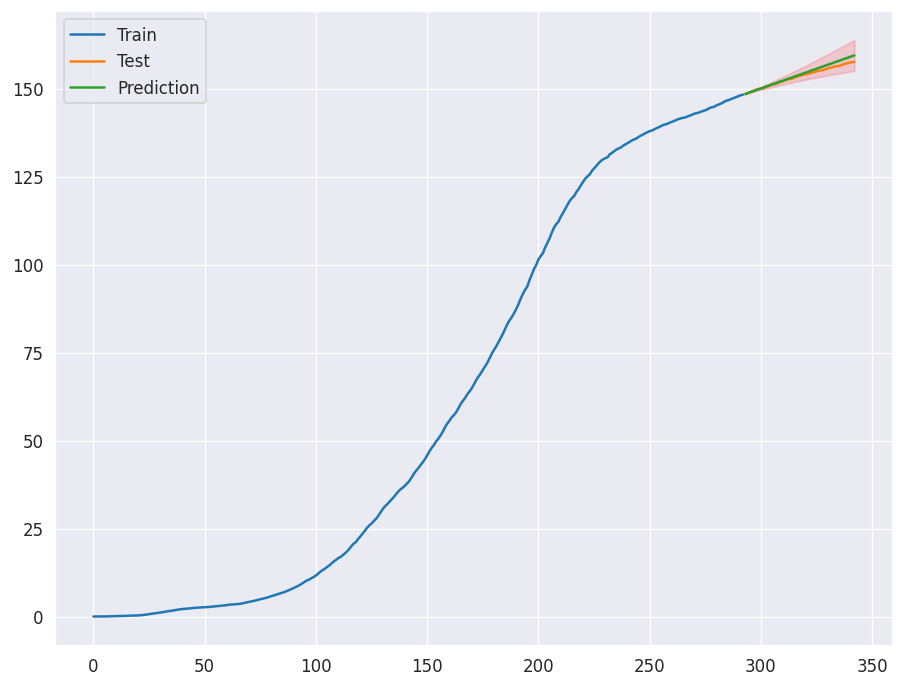

In [ ]:
train = val[:293]
test = val[293:]
steps = 50 
model_canada = pm.auto_arima(train,trace=True,error_action='ignore', suppress_warnings=True)
model_canada.fit(train)
forecast,confint_ = model_canada.predict(n_periods=50,return_conf_int=True,alpha=0.65)
index_of_fc_ = np.arange(len(train), len(train)+steps)

forecast = pd.DataFrame(forecast,index = index_of_fc_,columns=['Prediction'])
test = pd.DataFrame(test,index = index_of_fc_)
lower_series = pd.Series(confint_[:, 0], index=index_of_fc_)
upper_series = pd.Series(confint_[:, 1], index=index_of_fc_)


plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend(loc='upper left')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='r', alpha=.15)
plt.show()


We split our model into train and test to further investigate how well model fits on the training data. The plot shows that the model performs well as both test and predictions curves align with the training curve

**United States**

In [ ]:
df_US = df[df['location']=='United States']
val_us = df_US['total_vaccinations_per_hundred'].values

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
adfuller_test(df_US['total_vaccinations_per_hundred'])

ADF Test Statistic : -2.7175842291701913
p-value : 0.07104454387274281
#Lags Used : 15
Number of Observations Used : 328
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Discussion:** From the above statistical tests and plots we observe that our dataset is not stationary. In order to perform time series analysis on our dataset, we need to transform our data in to stationary data. In order to achieve that we can perform differencing operation on our dataset. The plots above for both Canada and US show that our dataset becomes stationary after second order differencing.
Now we will also use the auto arima function to verify our values for p,d and q.

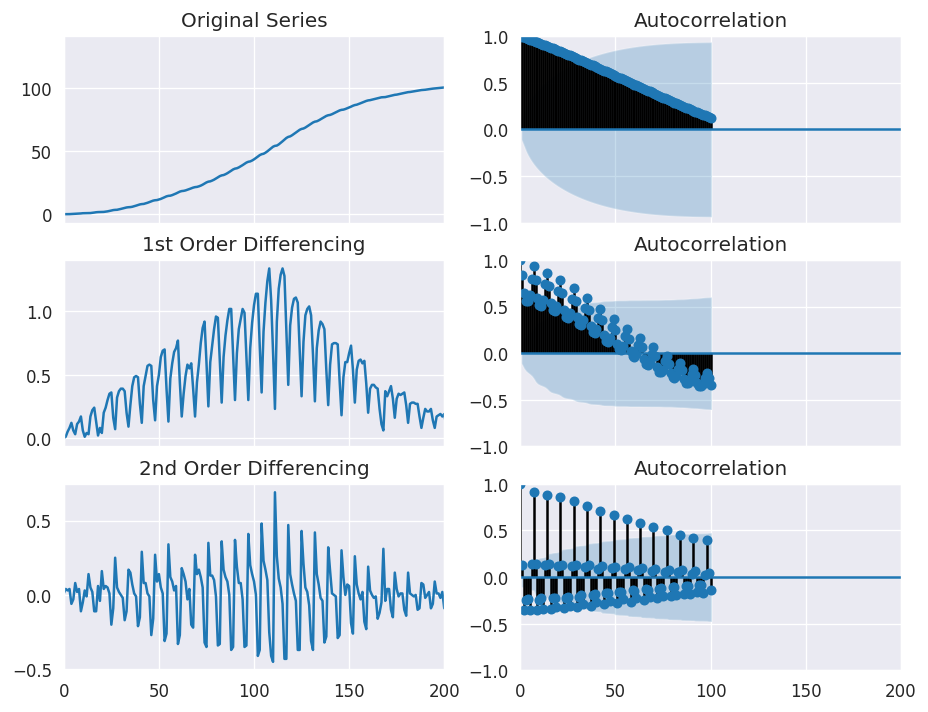

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val_us); axes[0, 0].set_title('Original Series')
axes[0,0].set(xlim = (0,200))
plot_acf(val_us,lags=100, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val_us)); axes[1, 0].set_title('1st Order Differencing')
axes[0,0].set(xlim = (0,200))
plot_acf(np.diff(val_us),lags=100, ax=axes[1, 1])
diffval = np.diff(val_us)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
axes[0,0].set(xlim = (0,200))
plot_acf(np.diff(diffval),lags=100, ax=axes[2, 1])
diffval_ = np.diff(diffval)
plt.show()


**By looking at the above plots we observe that the data achieves stationarity after second order differencing.
The auto-corelation plots help us determine if our series have been over diffenced or under differenced. In this case, after the first lag the lag into the negative zone above the confidence interval boundary and then fluctutates between positive and negative zones after that. The series going in to negative zone quickly might be an idication that our series has been overdifferenced. 
We will confirm our findings through the values for p,d,q given by the auto-arima model**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model_2 = pm.auto_arima(val_us, start_p=1, start_q=1,
test='adf',
max_p=3, max_q=3, 
m=1, 
d=None, 
seasonal=False, 
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-307.310, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-272.286, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-275.675, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-284.608, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-274.286, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-421.719, Time=0.51 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-325.299, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-428.024, Time=0.75 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-333.045, Time=0.25 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-429.084, Time=1.11 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-516.274, Time=1.05 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-446.514, Time=1.14 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-413.590, Time=1.07 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : 

On comparing different models the best model with repect to the AIC scores, the best model has (p,d,q) values of (2,2,3)

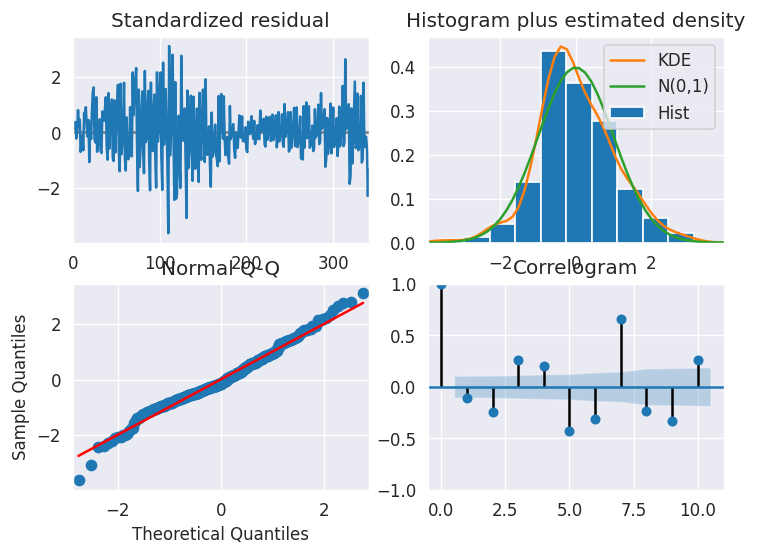

In [ ]:
model_2.plot_diagnostics(figsize=(7,5))
plt.show()

**Discusssion for diagnostics**


**Standardised Residual:**

Residual errors themselves can form a time series with temporary strucuture. An ideal model has no structure in the residual errors and would have only random fluctuations that cannot be modeled.
The plot for residual error of our ARIMA model shows that constant fluctuation of values around mean of zero and that they have a uniform variance. 

**Histogram plus estimated Density**

The plot for suggests that our data is noramlly distributed and has mean zero.
A model that does not have zero mean would indicate that the model could not capture the complete information about the nature of our dataset.

**Quantile-plot**

The plot shows that all almost data points align perfectly along the expected distribution of points. This means that our data is normally distributed and is not skewed. Although, one outlier at the top and some data points that do not align with the line are evident, everything seems good overall.

**Correlogram** 

The plot for autocorelation shows that the residual errors are not auto corelated since most of the errors lie in the confidence interval area and fluctuate between the positive and negative zones.
Auto-corelation would mean that the errors have some structure and the model fails to capture information about some part of the data as stated in the previous steps.

Overall, from our analysis of the diagnostics model, we can conclude that the model meets all expectations and can be used for making predictions.

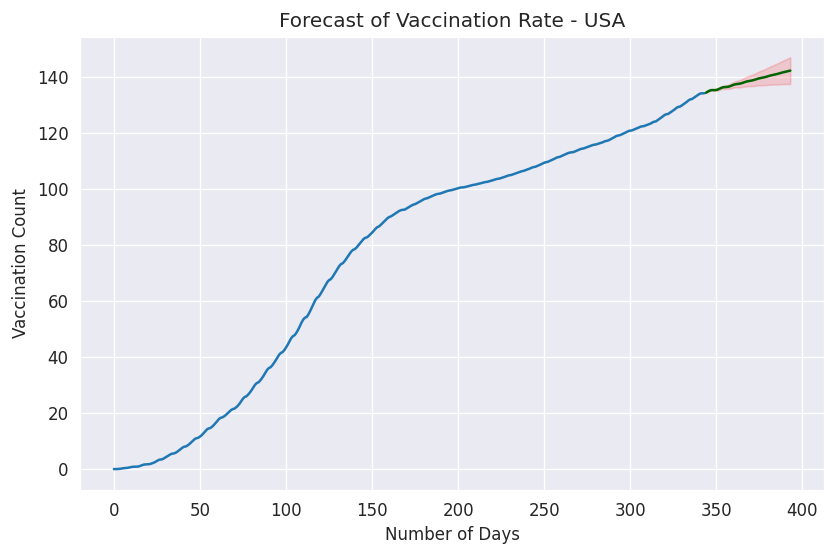

In [ ]:
n_periods = 50
fc_, confint_ = model_2.predict(n_periods=n_periods, return_conf_int=True,alpha=0.65)
index_of_fc_ = np.arange(len(val_us), len(val_us)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc_, index=index_of_fc_)
lower_series = pd.Series(confint_[:, 0], index=index_of_fc_)
upper_series = pd.Series(confint_[:, 1], index=index_of_fc_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(val_us)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='r', alpha=.15)
plt.title("Forecast of Vaccination Rate - USA")
plt.xlabel('Number of Days')
plt.ylabel('Vaccination Count')
plt.show()

In [ ]:
print("----------------------------Number of people vaccinated in next 50 days--------------------------------------")
print('Base-Case scenario  {} per hundred'.format(round(fc_[-1]-val_us[-1])))
print('Best case scenario {} per hundred'.format(round(upper_series.iloc[-1]-val_us[-1])))
print('Worst-Case scenario {} per hundred'.format(round(lower_series.iloc[-1]-val_us[-1])))


----------------------------Number of people vaccinated in next 50 days--------------------------------------
Base-Case scenario  8 per hundred
Best case scenario 13 per hundred
Worst-Case scenario 3 per hundred


**------------------------------------------------------DISCUSSION---------------------------------------------------------------------------------------------** 

The plot above shows the vaccination trend for the next 50 days for United States. 
Our plot generates predictions for best case, base case and worst case scenarios. The upper part of the confidence interval (red zone) indicates the best case scenario whereas the region in the centre indicates the base case while the bottom region of the curve indicates the worst case scenario.

Our plot shows that the base case follows the current trent of the curve showing gradual increase in the total nuber of vaccinations.

For the best case scenario, our model shows steep increase in the total number of vaccinations fairly quickly.

For the worst case scenario our the number of vaccinations would remain constant and we would observe a plateau in the curve.



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-440.218, Time=0.59 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-217.240, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-221.482, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-230.790, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-318.301, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-350.676, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-354.179, Time=0.44 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-366.734, Time=0.64 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-245.950, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-344.150, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-358.006, Time=0.24 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-374.396, Time=0.57 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-438.307, Time=0.93 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 4.384 seconds


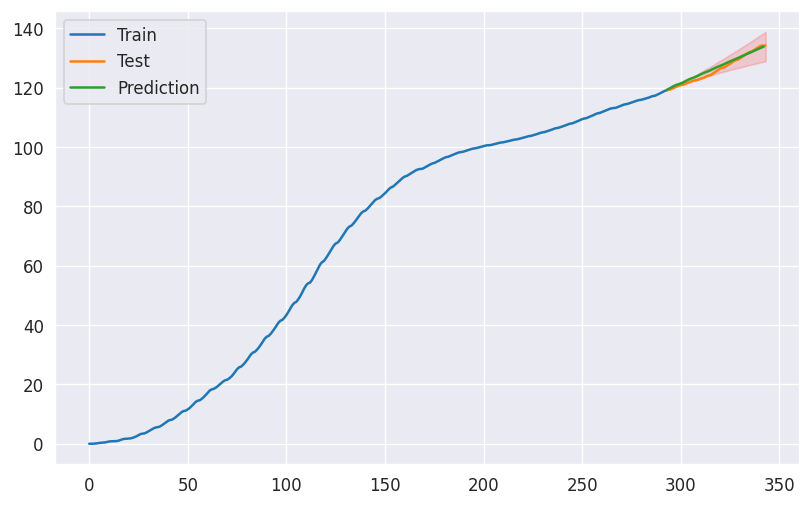

In [ ]:
train_us = val_us[:294]
test_us = val_us[294:]
model_us = pm.auto_arima(train_us,trace=True,error_action='ignore', suppress_warnings=True)
model_us.fit(train_us)
steps = 50 
forecast,confint_ = model_us.predict(n_periods=50,return_conf_int=True,alpha=0.65)
index_of_fc_ = np.arange(len(train_us), len(train_us)+steps)

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
test_us = pd.DataFrame(test_us,index = index_of_fc_)
lower_series = pd.Series(confint_[:, 0], index=index_of_fc_)
upper_series = pd.Series(confint_[:, 1], index=index_of_fc_)

plt.figure(figsize=(8,5))
plt.plot(train_us, label='Train')
plt.plot(test_us, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='r', alpha=.15)
plt.show()

We split our model into train and test to further investigate how well model fits on the training data. The plot shows that the model performs well as both test and predictions curves align with the training curve

# Part 4:

# **Summary:**
In this part we try to extract the effect of vaccinations on a number of factors like 
1. Progression of cases in Canada and USA over time
2. The occupancy of ICU before and after the vaccination program in Canada and USA
3. Effect of vaccination on the new cases 
4. Effect of vaccination on the positivity rate 
5. Effect of vaccination on the number of deaths over time during the course of the pandemic.
6. Effect on stringency index
7. Effect on covid-19 testing

**Step 1:**

Our analysis as can also be seen in the plots show that vaccination proved effective against reducing the number of icu patients, the positivity rate and also the number of deaths in both these two countries. Increase in number of vaccination also saw in less stringent rules set to fight the pandemic and also reduced the total number of cases conducted daily.
With increase in number of vaccinations the number of people who required an ICU and also the number of deaths saw a decreasing trend. This is a significant achievement as it means that the covid-19 patients did not require serious treatment in order to recover from the disease thus taking the pressure off the healthcare system in the two locations. However, for all these factors we could see a spike after a sudden drop. The increase is due to the country entering into a new wave of covid-19 infections.
Thus, through our analysis we can conclude that the vaccine proved effective against reducing the severity of the pandemic and in taking the pressure off the healthcare system in Canada and the United States.

**Step 2: Co-relation:** 

From the co-relation plot of the features and on perfroming the pearson corelation test on our features we were able to conclude that the features 'people_vaccinated' and 'total_deaths' were highly related. Both features have a very high co-relation (close to 0.9) which proves the dependency of one feature over the other. To further investiate the relationship of the two features we use a linear regression to predict the values of the number of death through the number of people vaccinated. 
The Rsquared value for Canada was about 0.7 and about 0.88 for the United States. These metrics and the plots for the observed and the predicted values prove that our model was a very good fit and that the two are highly co-related. In other words, vaccination has a direct relationship with the number of deaths in both Canada and United States.

Other major findings from our plots show that the 'people vaccinated' and 'new_deaths' features have high negative co-relation. The high negative corelation shows that if one of the features follow an increasing trend, the other feature would follow the opposite trend. Thus, in this case we can say that with increase in number of vaccination the number of new deaths decrease with time in both Canada and the United states. This reiterates our finding from the plots in step 1 of part 4.


In [ ]:
df_comp.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df_comp.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df_comp['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [ ]:
df_comp.isnull().sum()

iso_code                                        0
continent                                    8578
location                                        0
date                                            0
total_cases                                  7393
                                            ...  
human_development_index                     18176
excess_mortality_cumulative_absolute       129736
excess_mortality_cumulative                129736
excess_mortality                           129736
excess_mortality_cumulative_per_million    129736
Length: 67, dtype: int64

In [ ]:
# We will perform our analysis on Canada and US
df_comp_canada = df_comp[df_comp['location']=='Canada']
df_comp_US = df_comp[df_comp['location']=='United States']

In [ ]:
df_comp_US = df_comp_US.drop(df_comp_US[df_comp_US.total_vaccinations.isna()].index)
df_comp_canada = df_comp_canada.drop(df_comp_canada[df_comp_canada.total_vaccinations.isna()].index)

Covid-19 cases curve

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['date'], y=df_comp_canada['new_cases']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['date'], y=df_comp_US['new_cases']),
    row=1, col=2
)

fig['layout']['xaxis']['title']='Date'
fig['layout']['xaxis2']['title']='Date'
fig['layout']['yaxis']['title']='Number of new cases'
fig['layout']['yaxis2']['title']='Number of new cases'

fig.update_layout(height=500, width=1300, title_text="progression of cases over time")
fig.show()

Vaccination trend

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['date'], y=df_comp_canada['people_vaccinated']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['date'], y=df_comp_US['people_vaccinated']),
    row=1, col=2
)

fig['layout']['xaxis']['title']='Date'
fig['layout']['xaxis2']['title']='Date'
fig['layout']['yaxis']['title']='Number of people vaccinated'
fig['layout']['yaxis2']['title']='Number of  people vaccinated'

fig.update_layout(height=500, width=1300, title_text="Trend of vaccination in both countries")
fig.show()

Booster shots delivered


In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['date'], y=df_comp_canada['total_boosters']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['date'], y=df_comp_US['total_boosters']),
    row=1, col=2
)

fig['layout']['xaxis']['title']='Date'
fig['layout']['xaxis2']['title']='Date'
fig['layout']['yaxis']['title']='Number of booster shots'
fig['layout']['yaxis2']['title']='Number of  booster shots'

fig.update_layout(height=500, width=1300, title_text="Trend for booster shots")
fig.show()

Effect of vaccination on new cases

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['people_vaccinated'], y=df_comp_canada['new_cases']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['people_vaccinated'], y=df_comp_US['new_cases']),
    row=1, col=2
)
fig['layout']['xaxis']['title']='Number of people vaccinated'
fig['layout']['xaxis2']['title']='Number of people vaccinated'
fig['layout']['yaxis']['title']='Number of new cases'
fig['layout']['yaxis2']['title']='Number of  new cases'
fig.update_layout(height=500, width=1300, title_text="Effect of vaccination on new_cases")
fig.show()

Effect of vaccinations on icu occupancy

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['people_vaccinated'], y=df_comp_canada['icu_patients']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['people_vaccinated'], y=df_comp_US['icu_patients']),
    row=1, col=2
)
fig['layout']['xaxis']['title']='Number of people vaccinated'
fig['layout']['xaxis2']['title']='Number of people vaccinated'
fig['layout']['yaxis']['title']='Number of ICU patients'
fig['layout']['yaxis2']['title']='Number of ICU patients'
fig.update_layout(height=500, width=1300, title_text="Effect of vaccination on ICU occupancy")
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['people_vaccinated'], y=df_comp_canada['positive_rate']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['people_vaccinated'], y=df_comp_US['positive_rate']),
    row=1, col=2
)
fig['layout']['xaxis']['title']='Number of people vaccinated'
fig['layout']['xaxis2']['title']='Number of people vaccinated'
fig['layout']['yaxis']['title']='Positivity Rate'
fig['layout']['yaxis2']['title']='Positivity Rate'
fig.update_layout(height=500, width=1300, title_text="Effect of vaccination on positivity rate")
fig.show()

Stringency Index

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['people_vaccinated'], y=df_comp_canada['stringency_index']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['people_vaccinated'], y=df_comp_US['stringency_index']),
    row=1, col=2)
fig['layout']['xaxis']['title']='Number of people vaccinated'
fig['layout']['xaxis2']['title']='Number of people vaccinated'
fig['layout']['yaxis']['title']='Stringency Index'
fig['layout']['yaxis2']['title']='Stringency Index'
fig.update_layout(height=500, width=1300, title_text="Effect of vaccination on stringecy index")
fig.show()

Effect on testing

In [ ]:

fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['people_vaccinated'], y=df_comp_canada['new_tests']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['people_vaccinated'], y=df_comp_US['new_tests']),
    row=1, col=2)
fig['layout']['xaxis']['title']='Number of people vaccinated'
fig['layout']['xaxis2']['title']='Number of people vaccinated'
fig['layout']['yaxis']['title']='Number of new tests conducted'
fig['layout']['yaxis2']['title']='Number of new tests conducted'
fig.update_layout(height=500, width=1300, title_text="Effect of vaccination on Covid-19 testing")
fig.show()

Decrease in number of deaths with increased vaccination


In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Canada",'United States'),column_widths=[1, 1])
                                                                                                  

fig.add_trace(
    go.Scatter(name= 'Canada',x=df_comp_canada['people_vaccinated'], y=df_comp_canada['new_deaths']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(name='United states',x=df_comp_US['people_vaccinated'], y=df_comp_US['new_deaths']),
    row=1, col=2
)
fig['layout']['xaxis']['title']='Number of people vaccinated'
fig['layout']['xaxis2']['title']='Number of people vaccinated'
fig['layout']['yaxis']['title']='Number of new deaths'
fig['layout']['yaxis2']['title']='Number of new deaths'
fig.update_layout(height=500, width=1300, title_text="Decrease in the number of deaths due to vaccination")
fig.show()

**correlation**

Canada correlation matrix

In [ ]:
corr_df = df_comp_canada.drop(['hospital_beds_per_thousand','handwashing_facilities','female_smokers','extreme_poverty','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','population'],axis=1)
corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm')

United states -  correlation matrix

In [ ]:
corr_df = df_comp_US.drop(['hospital_beds_per_thousand','handwashing_facilities','female_smokers','extreme_poverty','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','population'],axis=1)
corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm')

**correlation of features with 'people_vaccinated' - USA**

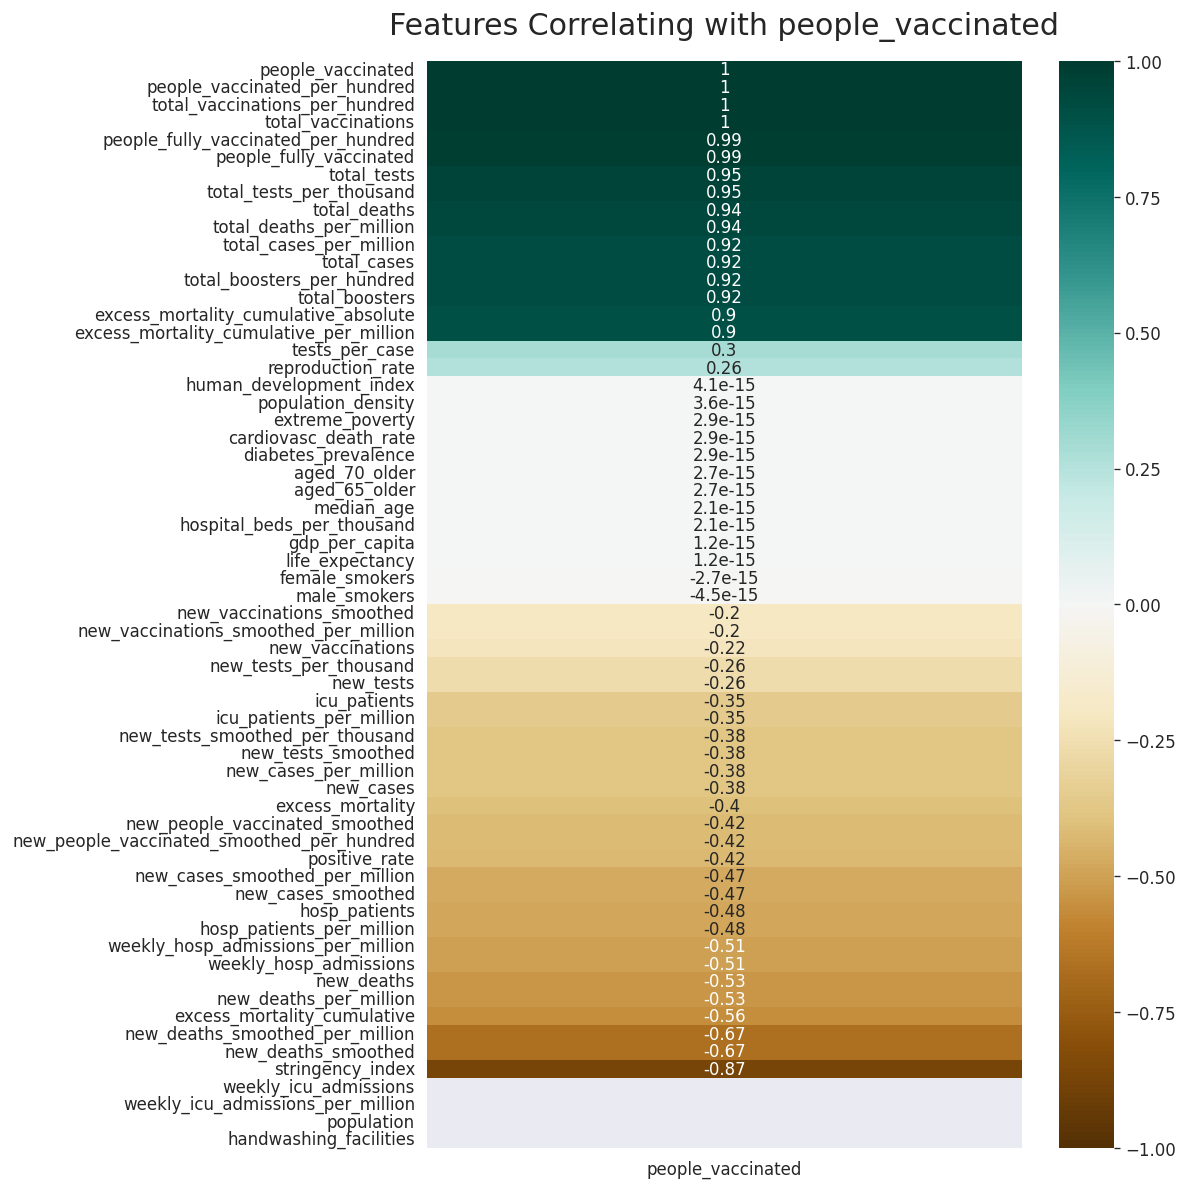

In [ ]:

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_comp_US.corr()[['people_vaccinated']].sort_values(by='people_vaccinated', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with people_vaccinated', fontdict={'fontsize':18}, pad=16);

**correlation of features with 'people_vaccinated' - Canada**

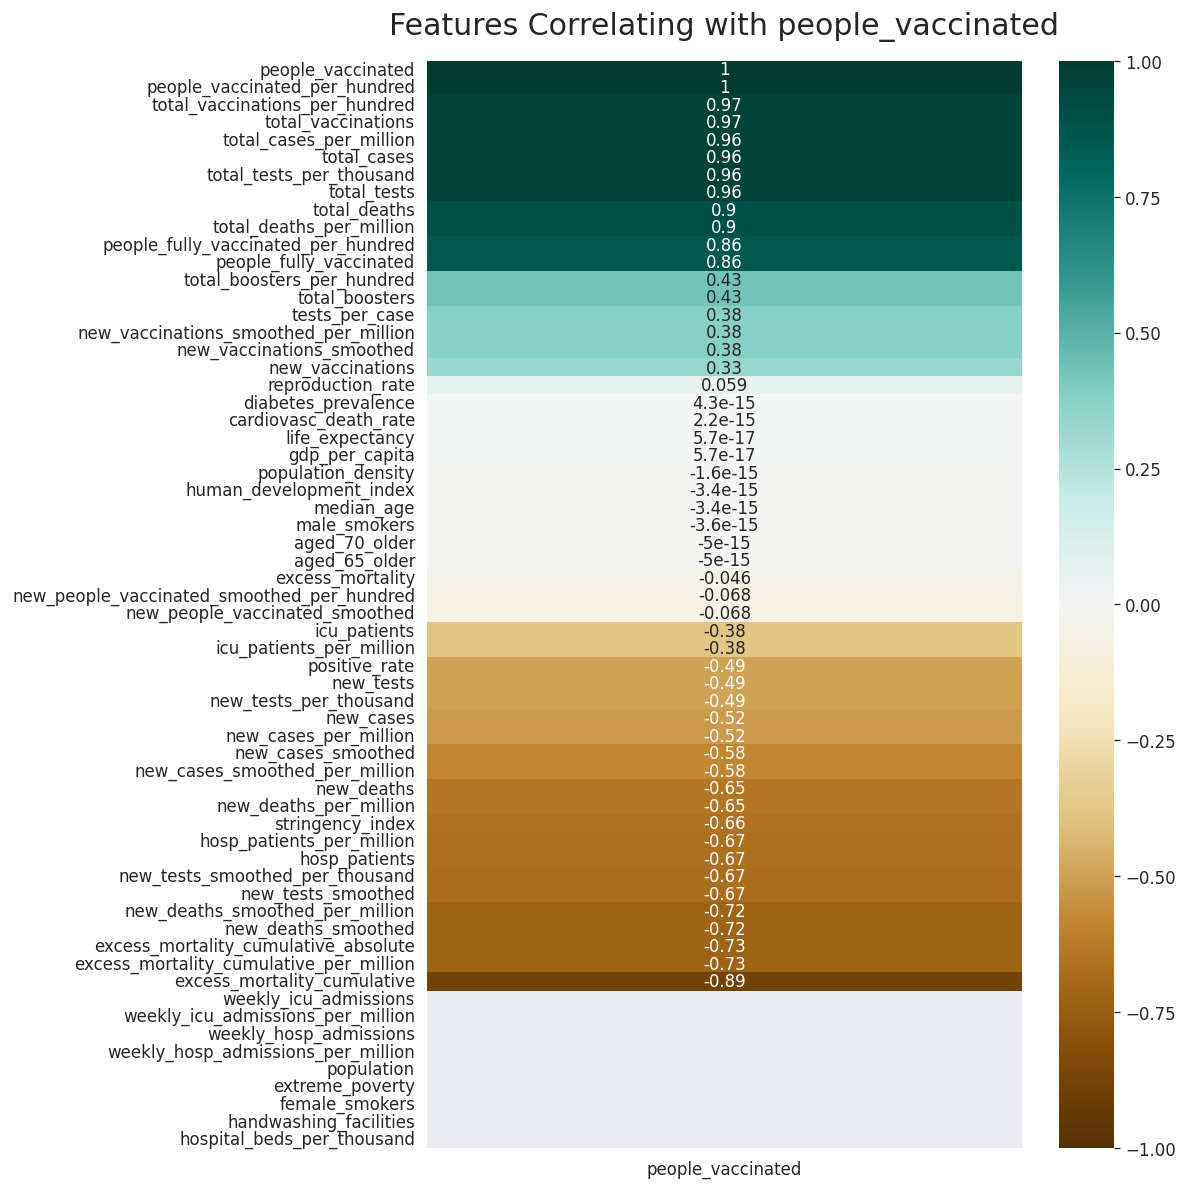

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_comp_canada.corr()[['people_vaccinated']].sort_values(by='people_vaccinated', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with people_vaccinated', fontdict={'fontsize':18}, pad=16);

**For Canada**

**Statistical test to check co-relation between people_vaccianted and total_detahs - Canada**

In [ ]:
from scipy.stats import pearsonr

 
# Convert dataframe into series
list1 = df_comp_canada["people_vaccinated"]
list2 = df_comp_canada["total_deaths"]
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.904


The correlation value is close to 1 which shows high correlation between both features.

**Linear regression - Canada**

In [ ]:
x_new=df_comp_canada["people_vaccinated"]
y_new=df_comp_canada["total_deaths"]
from sklearn.model_selection import train_test_split
Xtrain,Xvalid,ytrain,yvalid = train_test_split(x_new,y_new,test_size=0.2,random_state=1)
Xtrain.shape ,Xvalid.shape, ytrain.shape ,  yvalid.shape
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = np.array(Xtrain).reshape(-1,1)
Xvalid = np.array(Xvalid).reshape(-1,1)
Xtrain = sc.fit_transform(Xtrain)
Xvalid = sc.transform(Xvalid)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain,ytrain)

LinearRegression()

In [ ]:
y_pred_train = reg.predict(Xtrain)
y_pred_valid = reg.predict(Xvalid)

In [ ]:
print('R-squared Value {}'.format(sklearn.metrics.r2_score(yvalid,y_pred_valid)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yvalid, y_pred_valid)))

R-squared Value 0.7922397441021749
Root Mean Squared Error: 1758.1265324874587


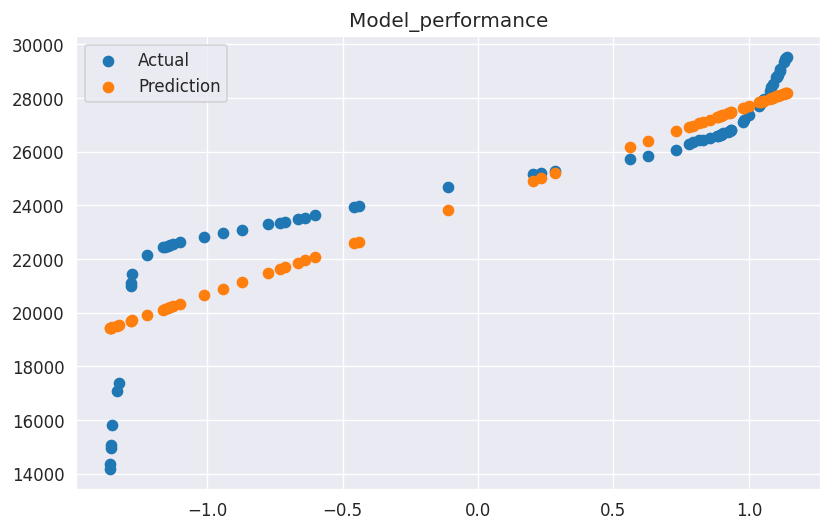

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(Xvalid, yvalid, label='Actual')
plt.scatter(Xvalid, y_pred_valid, label='Prediction')
plt.title('Model_performance')
plt.legend()
plt.show()

From the figure, we can concude that model fits the training data well and makes good predicitons. The rsquared value of our model is closed 0.7 which also indicated a good fit.

**Linear regression - United States**

**Statistical test to check co-relation between people_vaccianted and total_detahs - USA**

In [ ]:
from scipy.stats import pearsonr

 
# Convert dataframe into series
list1 = df_comp_US["people_vaccinated"]
list2 = df_comp_US["total_deaths"]
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.945


The correlation value is close to 1 which shows high correlation between both features.

In [ ]:
x_new=df_comp_US["people_vaccinated"]
y_new=df_comp_US['total_deaths']
from sklearn.model_selection import train_test_split
Xtrain,Xvalid,ytrain,yvalid = train_test_split(x_new,y_new,test_size=0.2,random_state=1)
Xtrain.shape ,Xvalid.shape, ytrain.shape ,  yvalid.shape
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = np.array(Xtrain).reshape(-1,1)
Xvalid = np.array(Xvalid).reshape(-1,1)
Xtrain = sc.fit_transform(Xtrain)
Xvalid = sc.transform(Xvalid)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred_train = reg.predict(Xtrain)
y_pred_valid = reg.predict(Xvalid)

In [ ]:
from sklearn import metrics
import sklearn.metrics
print('R-squared Value {}'.format(sklearn.metrics.r2_score(yvalid,y_pred_valid)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yvalid, y_pred_valid)))

R-squared Value 0.8811182065057929
Root Mean Squared Error: 38162.75236794649


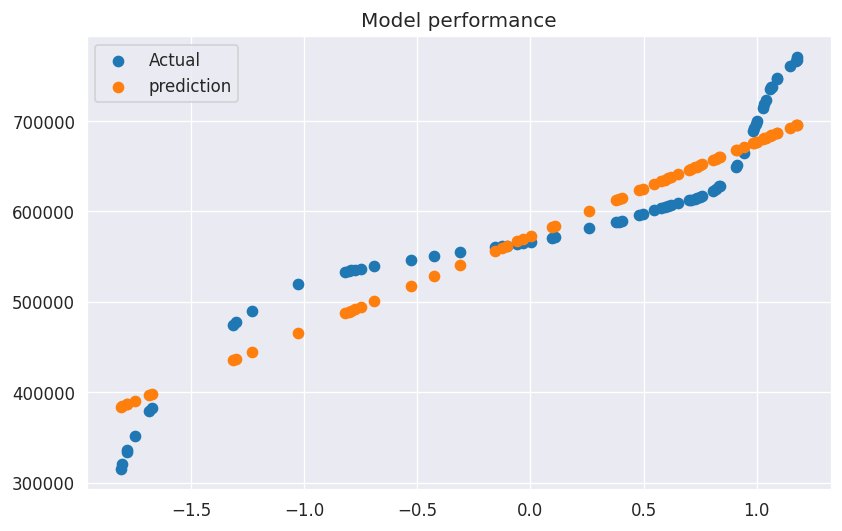

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(Xvalid, yvalid, label='Actual')
plt.scatter(Xvalid, y_pred_valid, label='prediction')
plt.title('Model performance')
plt.legend()
plt.show()

From the figure, we can concude that model fits the training data well and makes good predicitons. The rsquared value of our model is closed 0.8 which also indicated a good fit.

# Part 5

**Effect of vaccination on our daily lives**

In part 4, we tried to visualise the effect of vaccination on various aspects like positivity rate trend, stringency index, new tests,infected patients dependency on ICU facility and difference in the number of deaths before and after the vaccination.
Our observations show that both Canada and the United States saw a decrease in all of the above aspects. As a result, it pressure off the health care system and encouraged the government to work towards normalcy and get back the economic activity to pre-pandemic levels. Our plots also show that increase in vaccination resulted in less stringent rules in both countries. The stringency in Canada droped slightly after about 5M people were vaccianted but it saw a sudden and steep drop after the country was able to vaccinate a major chunk of their population.
On the other hand, United states saw a gradual decrease in the stringency index after almost regular intervals.
Also as more people get vaccinated, the number of tests conducted daily also show a decreasing trend. This shows the reliance of both countries on vaccination to keep a check on the pandemic. 
All of the above factors affect the daily lives of citizens of both countries either directly or indirectly.

**Better Vaccination program**

Although both Canada and United States have significant disparity in terms of their population size, our analysis show that United States outperformed Canada interms of the rate of vaccination. By the end of March 2021, United states had vaccinated about 50M citizens where Canada could only vaccinate 30M people until November 2021.
Also, United States outperformed Canada in terms of booster doses. Both countries started delievering booster doses by september 2021 and by November 2021 Canada had delivered 1M doses whereas the United States were succesful in delievering about 35M doses.
Also the positivity rate of United states, was better than that of canada as and when more people got vaccinated.
Thus, we can conclude that United states had better vaccination program than that of Canada
